## INSTAGRAM - SENTIMENTAL ANALYSIS

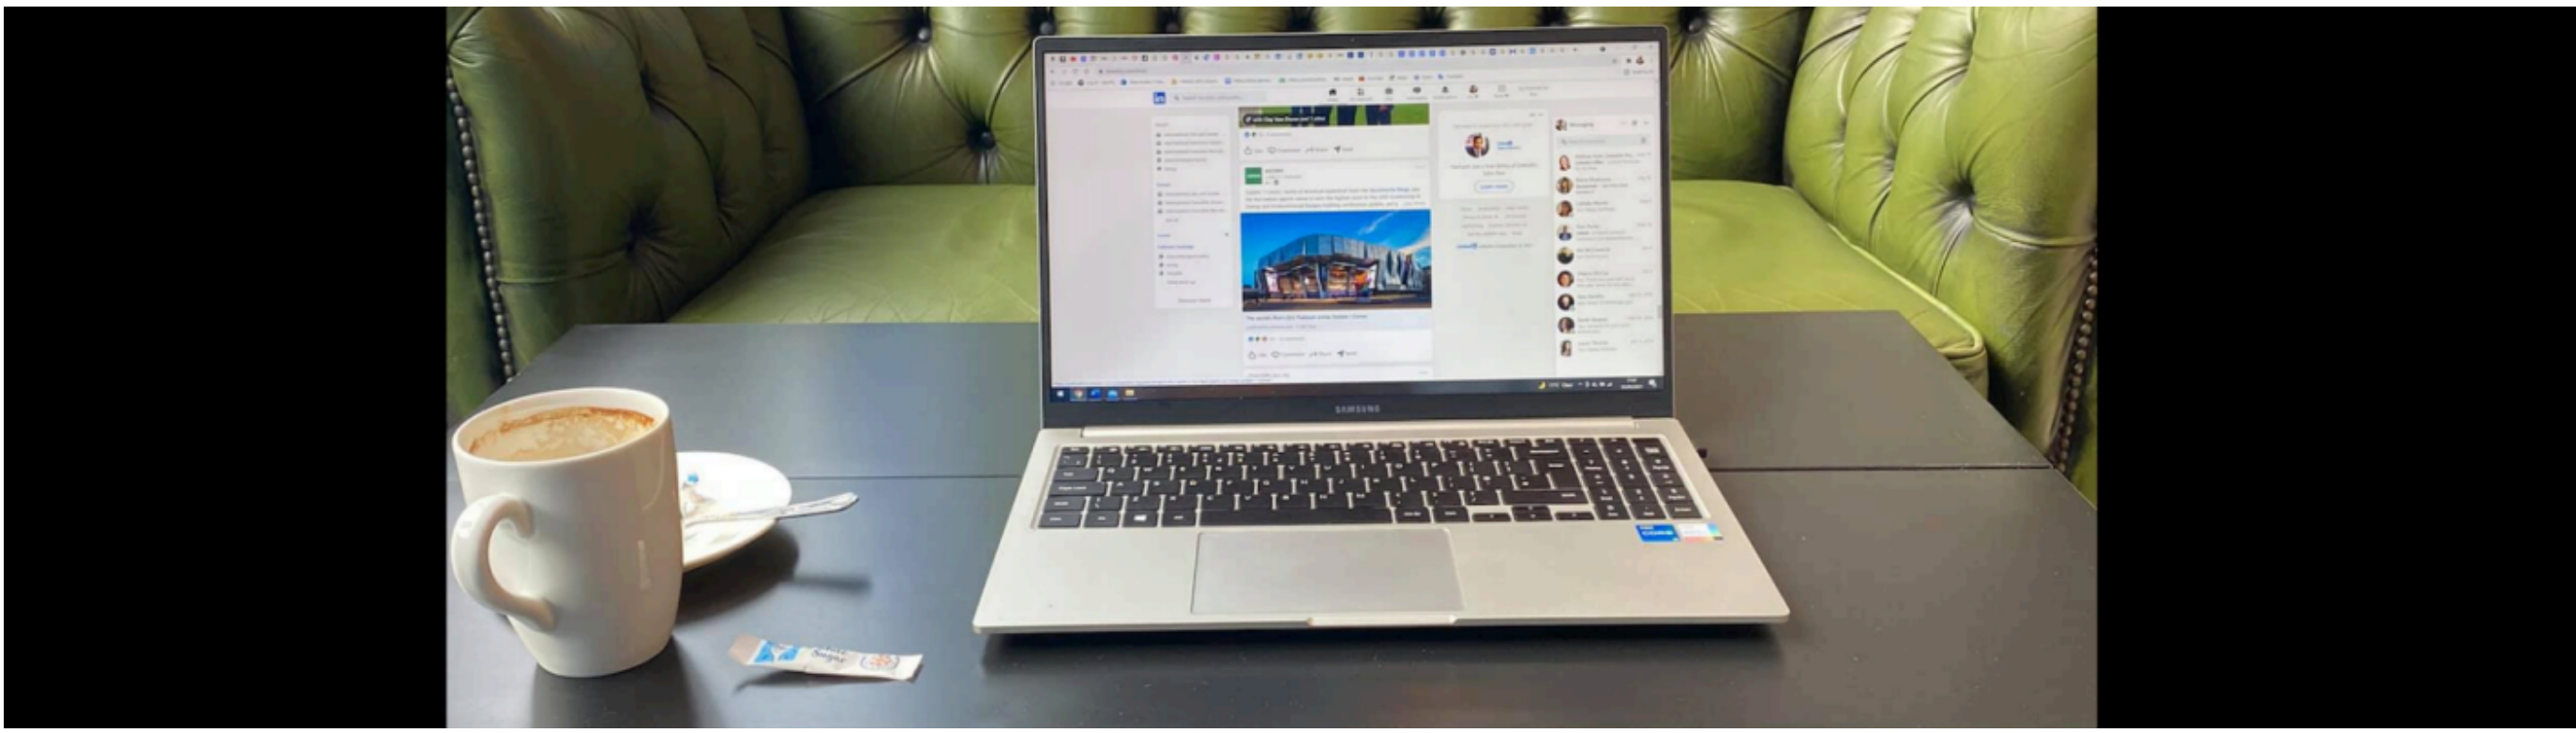

### HEMANT THAPA

### 1. LIBRARIES

In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("error")

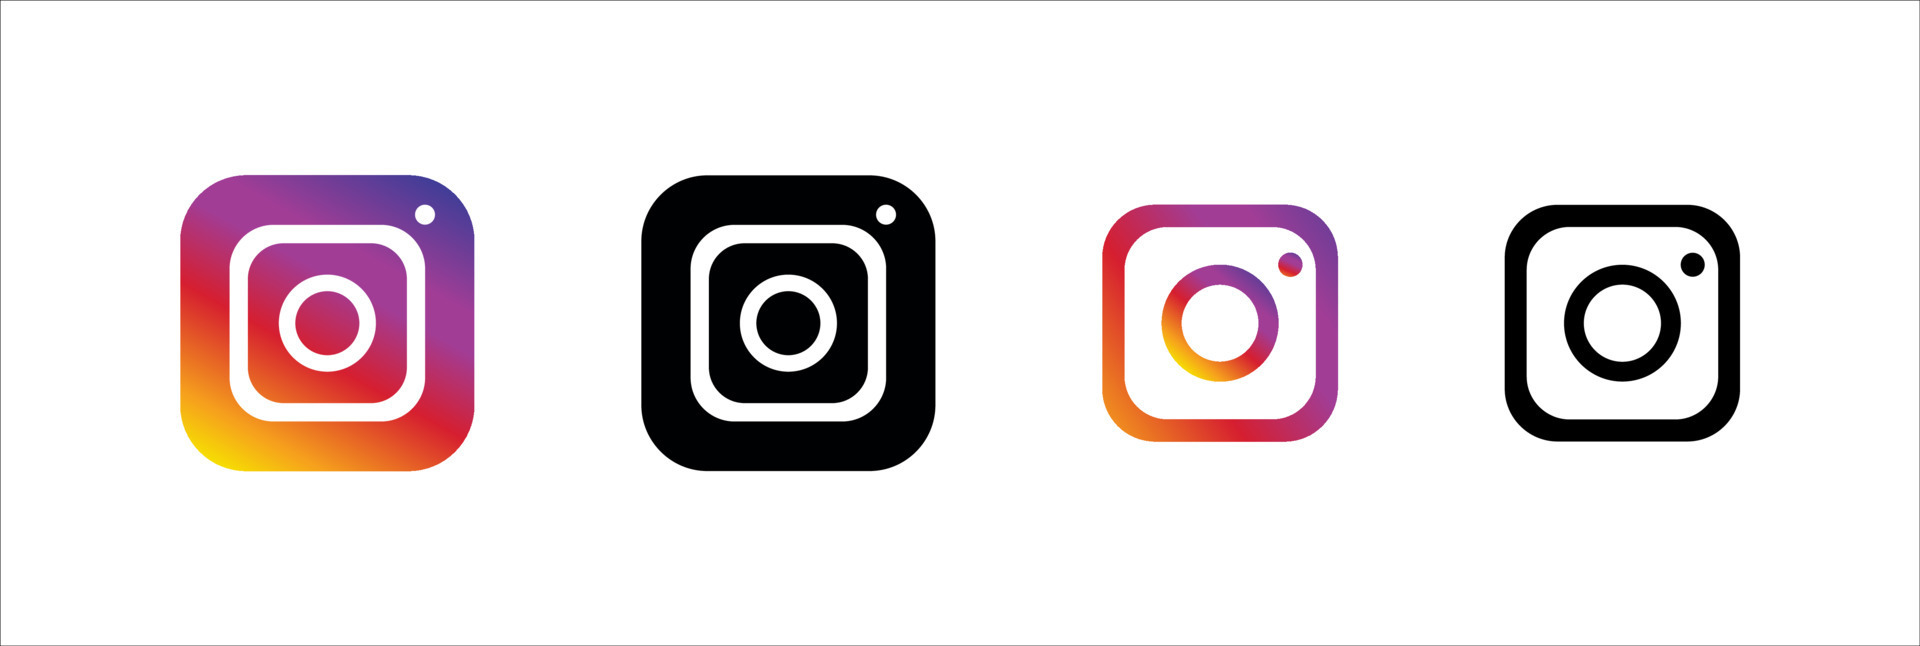

### 2. DATASET

In [253]:
df = pd.read_csv('comments_cleaned.csv')

### 3. DATA CLEANSING 

In [254]:
df.shape

(7488, 9)

In [255]:
df.isnull().sum()

Unnamed: 0             0
id                     0
comment                0
User  id               0
Photo id               0
created Timestamp      0
posted date            0
emoji used             0
Hashtags used count    0
dtype: int64

In [256]:
df.columns

Index(['Unnamed: 0', 'id', 'comment', 'User  id', 'Photo id',
       'created Timestamp', 'posted date', 'emoji used',
       'Hashtags used count'],
      dtype='object')

In [257]:
df.columns = df.columns.str.lower()

In [258]:
df.drop(['unnamed: 0', 'id'], axis = 1, inplace = True) 

In [259]:
df

,comment,user id,photo id,created timestamp,posted date,emoji used,hashtags used count
0,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1
...,...,...,...,...,...,...,...
7483,accusamus vel est,82,257,13-04-2023 08:04,April 14,no,5
7484,sit nulla qui,91,257,13-04-2023 08:04,April 14,no,6
7485,sed quidem vitae,93,257,13-04-2023 08:04,April 14,yes,2
7486,dolorem eveniet rerum,95,257,13-04-2023 08:04,April 14,yes,1


In [260]:
comments_per_user = df['user  id'].value_counts()
comments_per_user.unique()

array([257,  83,  80,  77,  76,  75,  74,  72,  70,  69,  68,  67,  66,
        65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,
        52,  49])

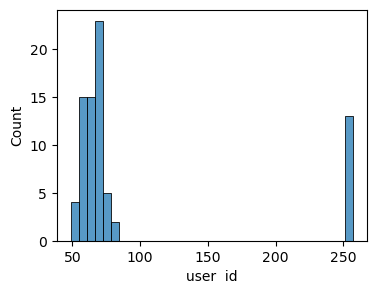

In [261]:
plt.figure(figsize=(4,3))
sns.histplot(comments_per_user);

In [262]:
comments_per_photo = df['photo id'].value_counts()

In [263]:
comments_per_photo.unique()

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23,
       22, 21])

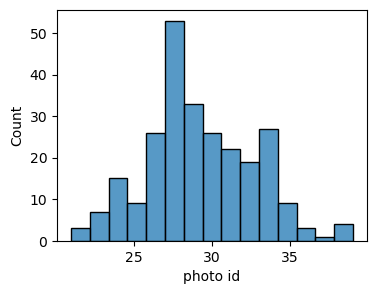

In [264]:
plt.figure(figsize=(4,3))
sns.histplot(comments_per_photo);

In [265]:
hashtags_dist = df['hashtags used count'].value_counts()

In [266]:
hashtags_dist.unique()

array([2496, 1872,  624])

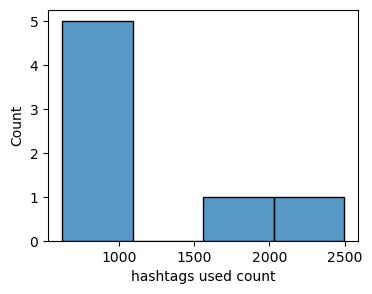

In [267]:
plt.figure(figsize=(4,3))
sns.histplot(hashtags_dist);

In [268]:
emoji_usage = df['emoji used'].value_counts()

In [269]:
emoji_usage.unique()

array([3744])

In [270]:
df['created timestamp'] = pd.to_datetime(df['created timestamp'])

In [271]:
date_range = df['created timestamp'].min(), df['created timestamp'].max()

In [272]:
date_range

(Timestamp('2023-04-13 08:04:00'), Timestamp('2023-04-13 08:04:00'))

In [273]:
df.describe()

,user id,photo id,hashtags used count
count,7488.000000,7488.000000,7488.000000
mean,48.949386,129.099225,2.416667
std,28.354045,73.776439,1.705905
min,2.000000,1.000000,0.000000
25%,24.000000,65.000000,1.000000
50%,48.000000,130.000000,2.000000
75%,72.000000,193.000000,3.250000
max,100.000000,257.000000,6.000000


In [274]:
all_comments = " ".join(x for x in df.comment)

In [275]:
wordcloud = WordCloud(background_color="white").generate(all_comments)

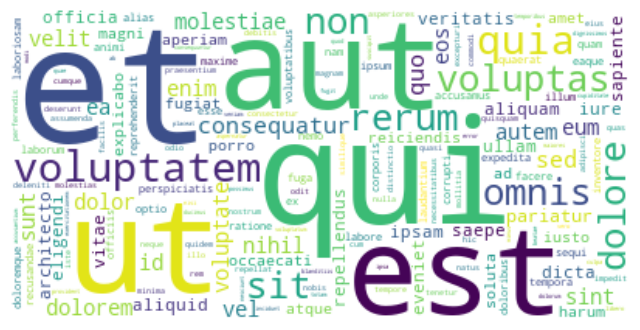

In [276]:
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [277]:
model = SentimentIntensityAnalyzer()

In [278]:
help(model)

Help on SentimentIntensityAnalyzer in module nltk.sentiment.vader object:

class SentimentIntensityAnalyzer(builtins.object)
 |  SentimentIntensityAnalyzer(lexicon_file='sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt')
 |  
 |  Give a sentiment intensity score to sentences.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lexicon_file='sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  make_lex_dict(self)
 |      Convert lexicon file to a dictionary
 |  
 |  polarity_scores(self, text)
 |      Return a float for sentiment strength based on the input text.
 |      Positive values are positive valence, negative value are negative
 |      valence.
 |  
 |  score_valence(self, sentiments, text)
 |  
 |  sentiment_valence(self, valence, sentitext, item, i, sentiments)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 

### NATURAL LANGUAGE PROCESSING

In [279]:
df['sentiment_scores'] = df['comment'].apply(model.polarity_scores)

In [280]:
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [281]:
df['sentiment'] = df['compound_score'].apply(lambda c: 'positive' 
                                             if c > 0.05 else ('negative' if c < -0.05 else 'neutral'))

In [282]:
df.head()

,comment,user id,photo id,created timestamp,posted date,emoji used,hashtags used count,sentiment_scores,compound_score,sentiment
0,unde at dolorem,2,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
1,quae ea ducimus,3,1,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
2,alias a voluptatum,5,1,2023-04-13 08:04:00,April 14,no,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
3,facere suscipit sunt,14,1,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
4,totam eligendi quaerat,17,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral


In [283]:
df['sentiment_polarity'] = df['comment'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [284]:
df['sentiment'] = df['sentiment_polarity'].apply(lambda p: 'positive' 
                                                 if p > 0 else ('negative' if p < 0 else 'neutral'))

In [285]:
df.head()

,comment,user id,photo id,created timestamp,posted date,emoji used,hashtags used count,sentiment_scores,compound_score,sentiment,sentiment_polarity
0,unde at dolorem,2,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
1,quae ea ducimus,3,1,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
2,alias a voluptatum,5,1,2023-04-13 08:04:00,April 14,no,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
3,facere suscipit sunt,14,1,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
4,totam eligendi quaerat,17,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0


In [286]:
df['sentiment'].unique()

array(['neutral', 'negative'], dtype=object)

In [287]:
df['sentiment'].value_counts()

neutral     7411
negative      77
Name: sentiment, dtype: int64

In [288]:
negative_comment = df[df['sentiment']=="negative"]

In [289]:
negative_comment.head()

,comment,user id,photo id,created timestamp,posted date,emoji used,hashtags used count,sentiment_scores,compound_score,sentiment,sentiment_polarity
250,minus quos eum,61,9,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
277,minus qui nobis,71,10,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
293,ut voluptatem minus,36,11,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
375,aut vel minus,94,13,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
377,minus consequatur doloremque,99,13,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1


In [290]:
negative_comments = " ".join(x for x in df.comment)

In [291]:
wordcloud = WordCloud(background_color="white").generate(negative_comments)

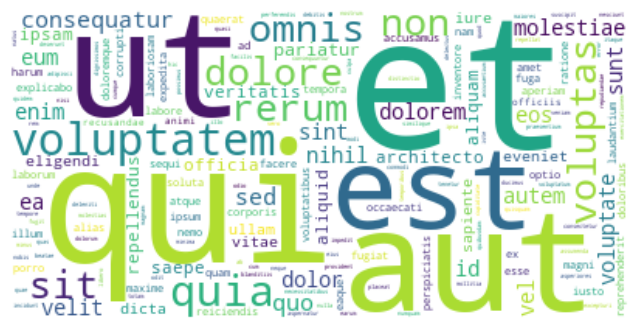

In [292]:
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [293]:
emoji = df.groupby('sentiment')['emoji used'].value_counts(normalize=True).unstack()
emoji

emoji used,no,yes
sentiment,,
negative,0.402597,0.597403
neutral,0.501012,0.498988


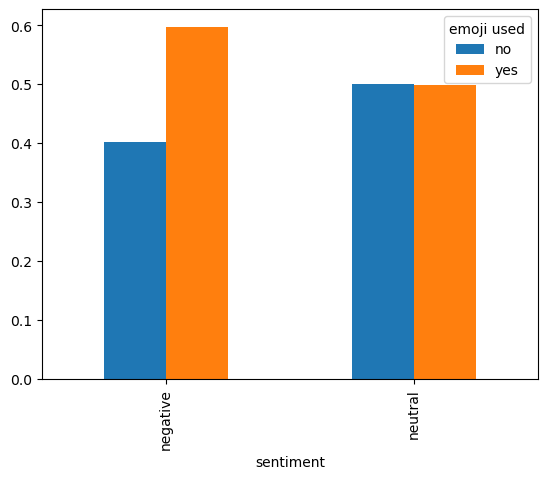

In [294]:
emoji.plot(kind="bar");

In [295]:
hashtag = df.groupby('sentiment')['hashtags used count'].value_counts(normalize=True).unstack()
hashtag

hashtags used count,0,1,2,3,4,5,6
sentiment,,,,,,,
negative,0.103896,0.311688,0.337662,0.025974,0.064935,0.038961,0.116883
neutral,0.083120,0.249359,0.333288,0.083929,0.083524,0.083794,0.082985


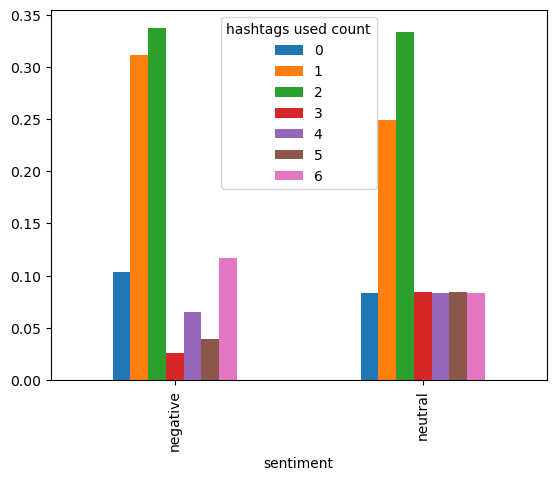

In [296]:
hashtag.plot(kind="bar");

In [297]:
df.head()

,comment,user id,photo id,created timestamp,posted date,emoji used,hashtags used count,sentiment_scores,compound_score,sentiment,sentiment_polarity
0,unde at dolorem,2,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
1,quae ea ducimus,3,1,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
2,alias a voluptatum,5,1,2023-04-13 08:04:00,April 14,no,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
3,facere suscipit sunt,14,1,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
4,totam eligendi quaerat,17,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0


In [298]:
df['emoji used'] = df['emoji used'].replace('yes', 1)

In [299]:
df['emoji used'] = df['emoji used'].replace('no', 0)

In [300]:
df[:2]

,comment,user id,photo id,created timestamp,posted date,emoji used,hashtags used count,sentiment_scores,compound_score,sentiment,sentiment_polarity
0,unde at dolorem,2,1,2023-04-13 08:04:00,April 14,1,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
1,quae ea ducimus,3,1,2023-04-13 08:04:00,April 14,0,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0


### CLASSIFICATION MODEL

In [304]:
X = df['hashtags used count'].values.reshape(-1,1)
X[:5]

array([[1],
       [2],
       [4],
       [2],
       [1]])

In [305]:
y = df['emoji used'].values.reshape(-1,1)
y[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10)

In [341]:
df.shape[0] * 0.20 

1497.6000000000001

In [342]:
df.shape[0] * 0.80

5990.400000000001

In [343]:
print(X_train.shape)
print(y_train.shape)

(6739, 1)
(6739, 1)


In [344]:
print(X_test.shape)
print(y_test.shape)

(749, 1)
(749, 1)


In [361]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [387]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
]

In [388]:
X_train, y_train = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

In [389]:
datasets = [make_circles(noise=0.2, random_state=False),
            make_classification(n_features=20, n_informative=5, n_redundant=5, random_state=False),
            make_moons(noise=0.2, random_state=False)]

for data in datasets:
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)
    
    print("Dataset Shape:", X.shape)
    print("="*50)
    
    for clf in classifiers:
        clf_name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{clf_name} Accuracy: {accuracy:.2f}")
    
    print("="*50)

Dataset Shape: (100, 2)
KNeighborsClassifier Accuracy: 0.75
SVC Accuracy: 0.45
SVC Accuracy: 0.60
GaussianProcessClassifier Accuracy: 0.40
DecisionTreeClassifier Accuracy: 0.60
RandomForestClassifier Accuracy: 0.70
MLPClassifier Accuracy: 0.50
AdaBoostClassifier Accuracy: 0.65
GaussianNB Accuracy: 0.55
Dataset Shape: (100, 20)
KNeighborsClassifier Accuracy: 0.85
SVC Accuracy: 0.95
SVC Accuracy: 0.45
GaussianProcessClassifier Accuracy: 0.90
DecisionTreeClassifier Accuracy: 0.90
RandomForestClassifier Accuracy: 0.80
MLPClassifier Accuracy: 0.95
AdaBoostClassifier Accuracy: 0.85
GaussianNB Accuracy: 0.90
Dataset Shape: (100, 2)
KNeighborsClassifier Accuracy: 0.95
SVC Accuracy: 0.75
SVC Accuracy: 0.95
GaussianProcessClassifier Accuracy: 0.95
DecisionTreeClassifier Accuracy: 0.85
RandomForestClassifier Accuracy: 0.80
MLPClassifier Accuracy: 0.85
AdaBoostClassifier Accuracy: 0.95
GaussianNB Accuracy: 0.85


### REFRENCES:
    
https://www.kaggle.com/datasets/sanjanchaudhari/user-behavior-on-instagram?resource=download

https://www.kaggle.com/code/rajatraj0502/user-behavior-on-instagram

https://www.kaggle.com/code/sanjanchaudhari/analyzing-user-behavior-on-instagram

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

https://seaborn.pydata.org/generated/seaborn.histplot.html